In [1]:
"""
# Exploratory Data Analysis for Benin Solar Dataset

This notebook performs comprehensive EDA on the Benin (Malanville) solar dataset.
"""

'\n# Exploratory Data Analysis for Benin Solar Dataset\n\nThis notebook performs comprehensive EDA on the Benin (Malanville) solar dataset.\n'

"""
# Exploratory Data Analysis for Benin Solar Dataset

This notebook performs comprehensive EDA on the Benin (Malanville) solar dataset.
"""

"""
## 1. Setup and Configuration
"""

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Optional imports (install if needed)
# import plotly.express as px
# from windrose import WindroseAxes  # pip install windrose

# Create plots directory if it doesn't exist
if not os.path.exists('plots'):
    os.makedirs('plots')
    print("Created 'plots' directory for saving figures")

# Set plotting style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Created 'plots' directory for saving figures


"""
## 2. Data Loading
"""

In [4]:
print("Loading Data")
file_path = '../data/benin-malanville.csv'
df = pd.read_csv(file_path)

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nFirst few rows:")
df.head()

Loading Data


Dataset shape: (525600, 19)
Number of rows: 525600
Number of columns: 19

First few rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
print("\nColumn data types:")
df.info()


Column data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB    

"""
## 3. Summary Statistics & Missing Values
"""

In [6]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [7]:
print("\nMissing values check:")
missing_values = df.isna().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})
print("\nColumns with >5% missing values:")
missing_df[missing_df['Percentage'] > 5].sort_values('Percentage', ascending=False)



Missing values check:

Columns with >5% missing values:


,Missing Values,Percentage
Comments,525600,100.0


"""
## 4. Timestamp Conversion
"""

In [8]:
print("\nConverting Timestamp")
# Convert timestamp to datetime if it exists
possible_timestamp_cols = ['Timestamp', 'timestamp', 'Date', 'date', 'datetime', 'time']
timestamp_col = None

for col in possible_timestamp_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])
        timestamp_col = col
        print(f"Converted {col} to datetime")
        break

if timestamp_col:
    df['year'] = df[timestamp_col].dt.year
    df['month'] = df[timestamp_col].dt.month
    df['day'] = df[timestamp_col].dt.day
    df['hour'] = df[timestamp_col].dt.hour
    print(f"Added year, month, day, and hour columns based on {timestamp_col}")


Converting Timestamp
Converted Timestamp to datetime
Added year, month, day, and hour columns based on Timestamp


"""
## 5. Outlier Detection
"""

In [9]:
print("\nOutlier Detection")
def detect_outliers(df, columns, z_threshold=3):
    outlier_counts = {}
    
    for col in columns:
        if col in df.columns:
            # Calculate z-scores
            df[f'{col}_zscore'] = np.abs(stats.zscore(df[col], nan_policy='omit'))
            
            # Count outliers
            outliers = df[df[f'{col}_zscore'] > z_threshold]
            outlier_counts[col] = len(outliers)
    
    return outlier_counts

# List of key columns to check for outliers
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
available_columns = [col for col in key_columns if col in df.columns]

# Detect outliers
outlier_counts = detect_outliers(df, available_columns)
print("Number of outliers detected (|z-score| > 3):")
for col, count in outlier_counts.items():
    print(f"{col}: {count} ({count/len(df)*100:.2f}%)")


Outlier Detection
Number of outliers detected (|z-score| > 3):
GHI: 89 (0.02%)
DNI: 0 (0.00%)
DHI: 3738 (0.71%)
ModA: 27 (0.01%)
ModB: 63 (0.01%)
WS: 3109 (0.59%)
WSgust: 3500 (0.67%)


"""
## 6. Basic Cleaning
"""

In [11]:
print("\nBasic Cleaning")
# Create a copy of the original dataframe before cleaning
df_clean = df.copy()

# Impute missing values in key columns with median
for col in available_columns:
    if df_clean[col].isna().sum() > 0:
        median_value = df_clean[col].median()
        print(f"Imputing {df_clean[col].isna().sum()} missing values in {col} with median: {median_value:.2f}")
        df_clean[col] = df_clean[col].fillna(median_value)
    
    # Remove extreme outliers (optional)
    if f'{col}_zscore' in df_clean.columns:
        extreme_outliers = df_clean[df_clean[f'{col}_zscore'] > 5].shape[0]
        if extreme_outliers > 0:
            print(f"Removing {extreme_outliers} extreme outliers in {col} (z-score > 5)")
            df_clean = df_clean[df_clean[f'{col}_zscore'] <= 5]

# Export cleaned DataFrame
output_path = '../data/benin_clean.csv'
df_clean.to_csv(output_path, index=False)
print(f"Cleaned dataset exported to {output_path}")


Basic Cleaning
Removing 446 extreme outliers in WS (z-score > 5)
Removing 112 extreme outliers in WSgust (z-score > 5)
Cleaned dataset exported to ../data/benin_clean.csv


"""
## 7. Time Series Analysis
"""


Time Series Analysis


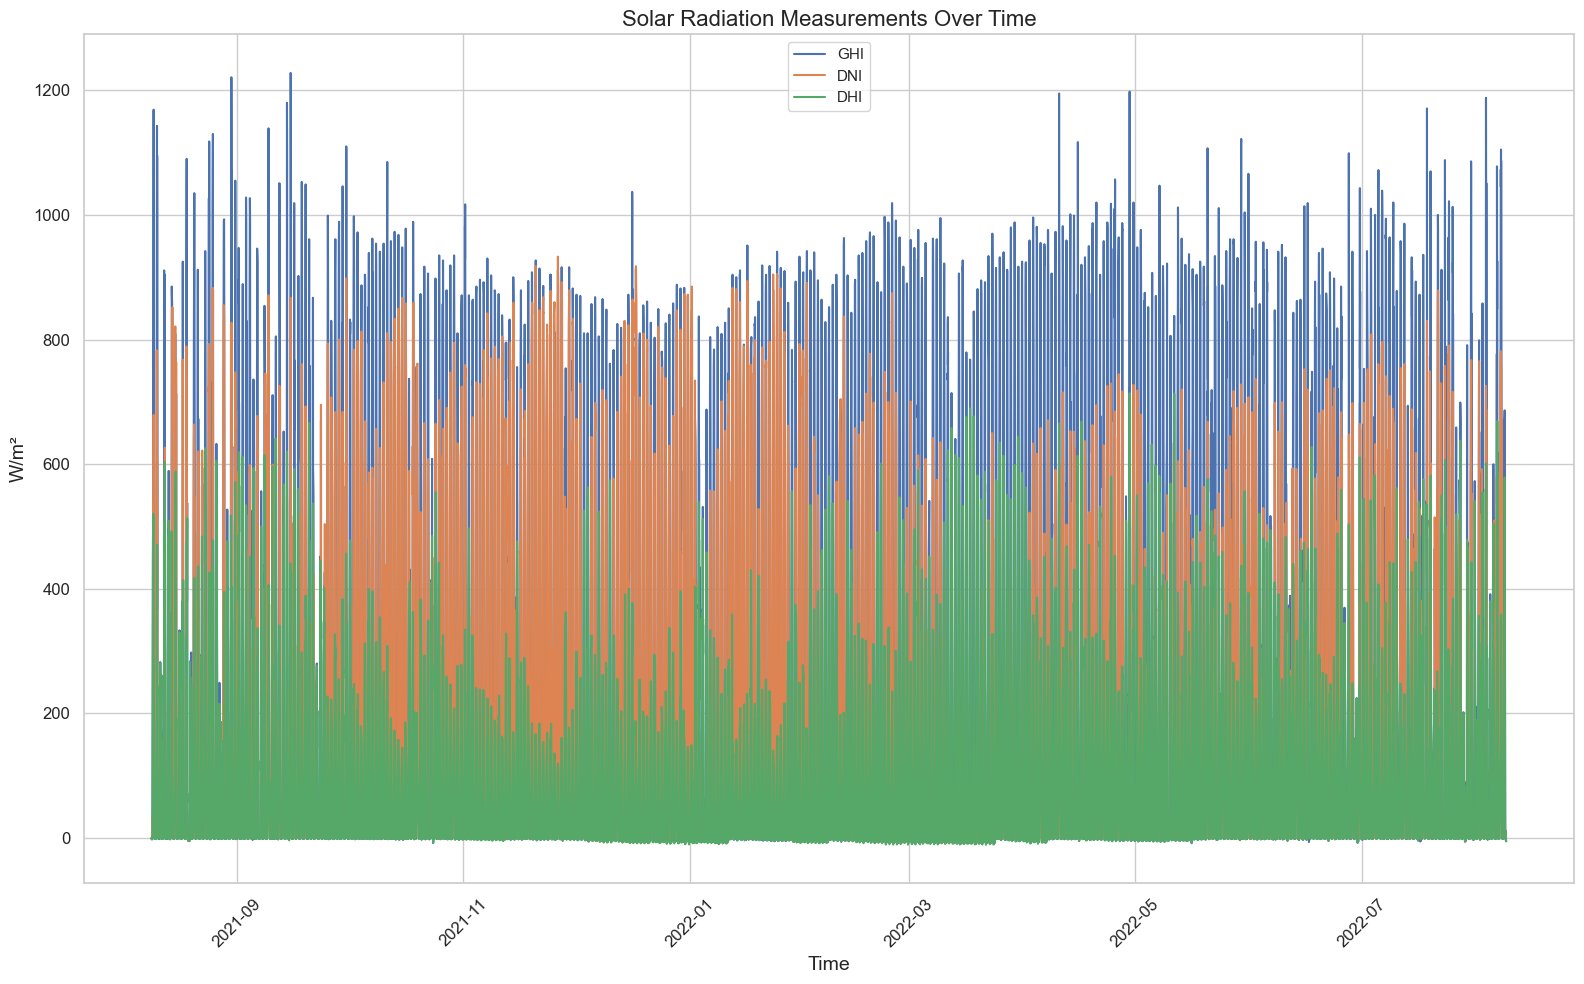

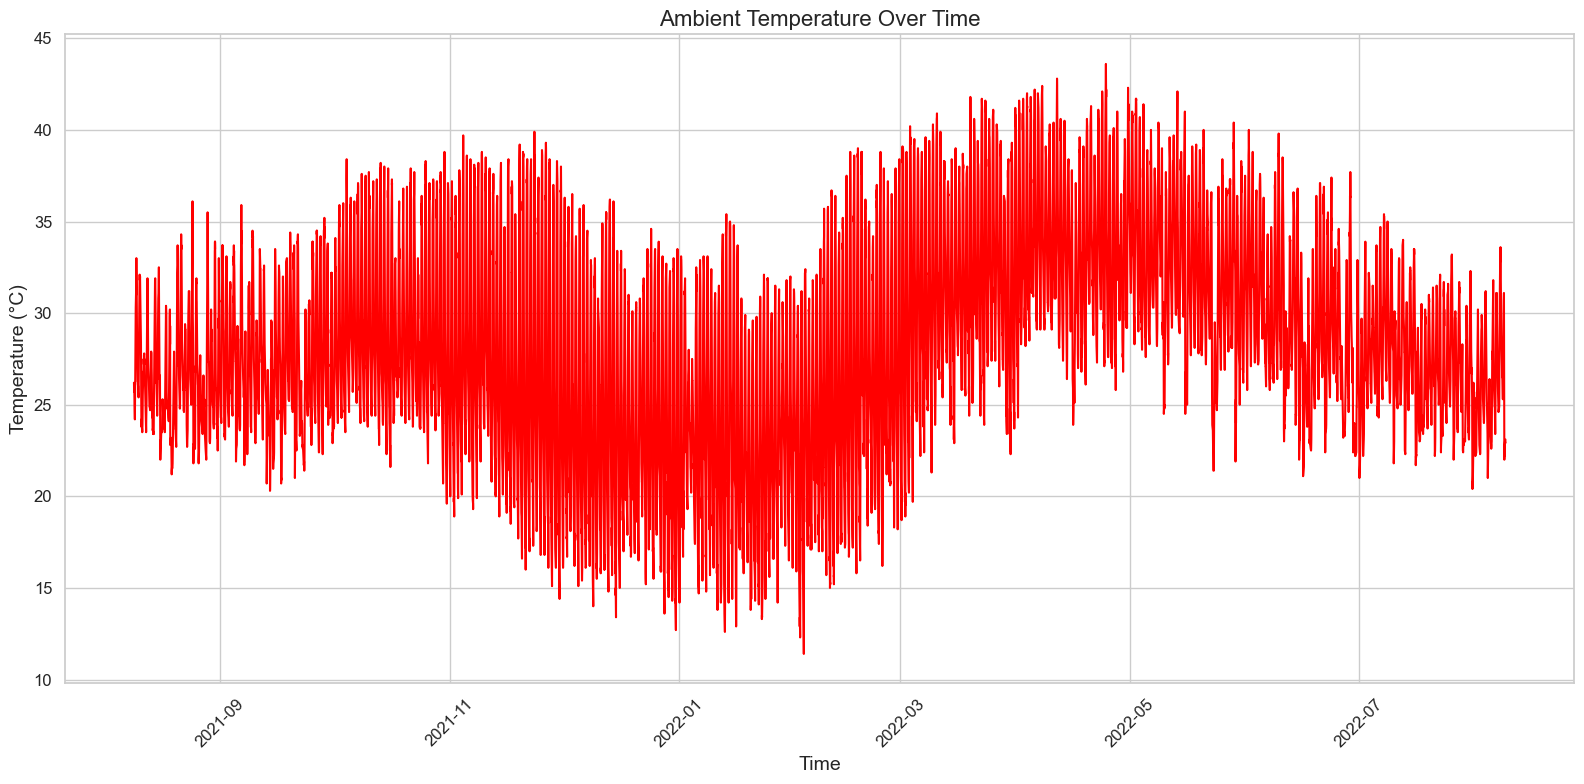

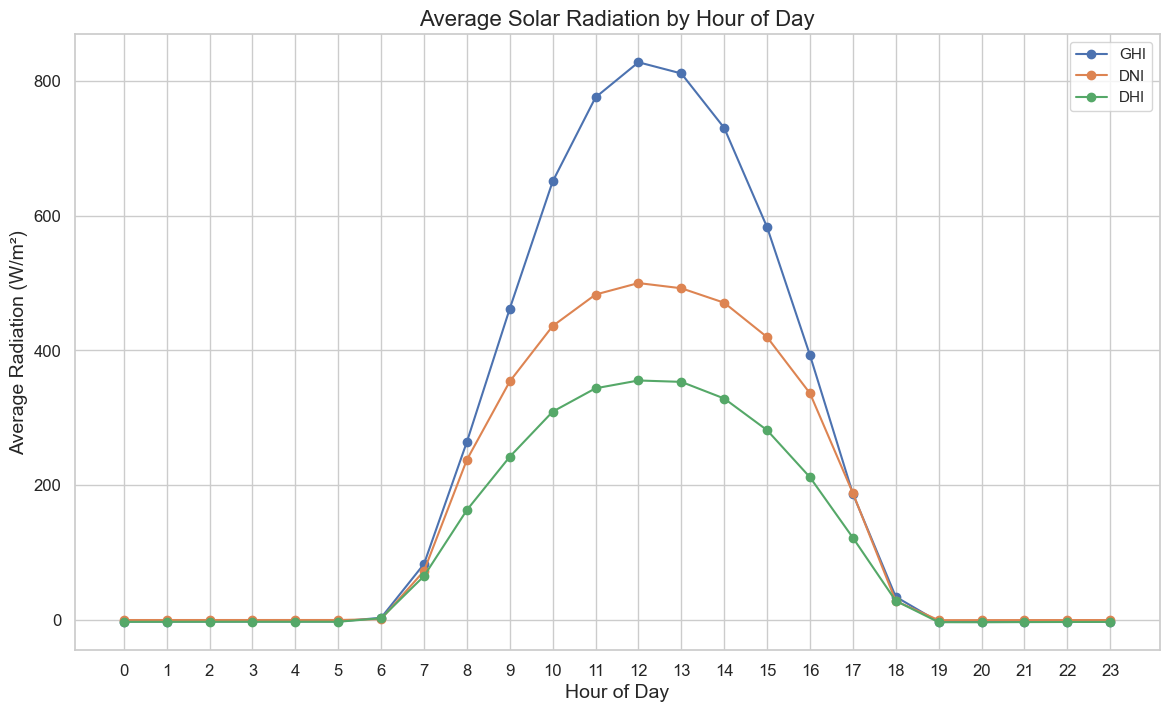

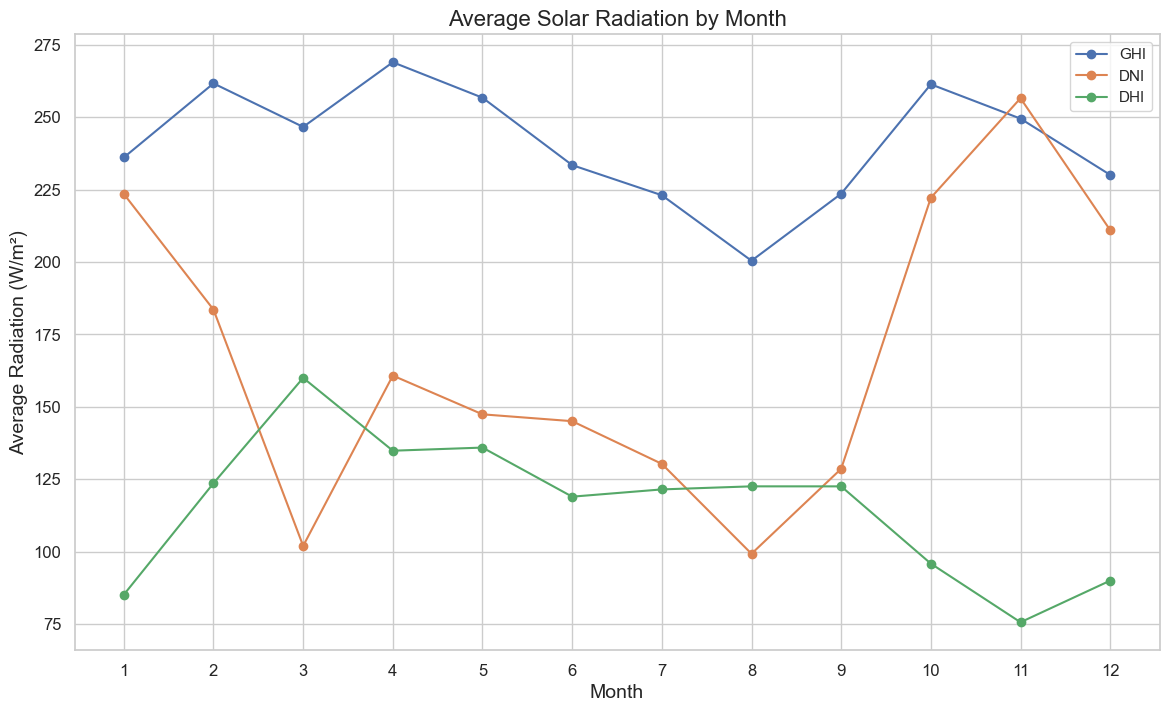

In [12]:
print("\nTime Series Analysis")
if timestamp_col:
    # Sample data if too many points
    if len(df_clean) > 10000:
        sample_size = 10000
        df_sample = df_clean.sample(sample_size, random_state=42)
        df_sample = df_sample.sort_values(by=timestamp_col)
    else:
        df_sample = df_clean.sort_values(by=timestamp_col)
    
    # Plot GHI, DNI, DHI
    radiation_cols = [col for col in ['GHI', 'DNI', 'DHI'] if col in df_clean.columns]
    
    plt.figure(figsize=(16, 10))
    for col in radiation_cols:
        plt.plot(df_sample[timestamp_col], df_sample[col], label=col)
    
    plt.title('Solar Radiation Measurements Over Time')
    plt.xlabel('Time')
    plt.ylabel('W/m²')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('plots/benin_radiation_time_series.png')
    plt.show()
    
    # Plot Tamb if available
    if 'Tamb' in df_clean.columns:
        plt.figure(figsize=(16, 8))
        plt.plot(df_sample[timestamp_col], df_sample['Tamb'], color='red')
        plt.title('Ambient Temperature Over Time')
        plt.xlabel('Time')
        plt.ylabel('Temperature (°C)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('plots/benin_temperature_time_series.png')
        plt.show()

    # Analyze daily patterns
    hourly_data = df_clean.groupby('hour').mean(numeric_only=True).reset_index()
    
    plt.figure(figsize=(14, 8))
    for col in radiation_cols:
        plt.plot(hourly_data['hour'], hourly_data[col], marker='o', label=col)
    
    plt.title('Average Solar Radiation by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Radiation (W/m²)')
    plt.xticks(range(0, 24))
    plt.legend()
    plt.grid(True)
    plt.savefig('plots/benin_hourly_radiation.png')
    plt.show()

    # Analyze monthly patterns
    monthly_data = df_clean.groupby('month').mean(numeric_only=True).reset_index()
    
    plt.figure(figsize=(14, 8))
    for col in radiation_cols:
        plt.plot(monthly_data['month'], monthly_data[col], marker='o', label=col)
    
    plt.title('Average Solar Radiation by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Radiation (W/m²)')
    plt.xticks(range(1, 13))
    plt.legend()
    plt.grid(True)
    plt.show()

"""
## 8. Cleaning Impact Analysis
"""

In [ ]:
print("\nCleaning Impact Analysis")
cleaning_cols = [col for col in df_clean.columns if 'clean' in col.lower()]

if cleaning_cols and 'ModA' in df_clean.columns and 'ModB' in df_clean.columns:
    cleaning_col = cleaning_cols[0]
    print(f"Found cleaning flag column: {cleaning_col}")
    
    # Group by cleaning flag
    grouped = df_clean.groupby(cleaning_col).mean(numeric_only=True)[['ModA', 'ModB']]
    
    # Plot average ModA & ModB pre/post-clean
    ax = grouped.plot(kind='bar', figsize=(10, 6))
    plt.title('Impact of Cleaning on Module Performance')
    plt.xlabel('Cleaning Status')
    plt.ylabel('Average Module Output')
    plt.xticks(rotation=0)
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f')
    
    plt.show()
else:
    print("No cleaning flag or module data found for cleaning impact analysis.")

In [ ]:
"""
## 9. Correlation Analysis
"""

In [ ]:
print("\nCorrelation Analysis")
correlation_cols = [col for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS'] 
                   if col in df_clean.columns]

if correlation_cols:
    corr_matrix = df_clean[correlation_cols].corr()
    
    # Create heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, annot=True, fmt='.2f')
    
    plt.title('Correlation Heatmap of Key Variables')
    plt.tight_layout()
    plt.show()

"""
## 10. Scatter Plot Analysis
"""

In [ ]:
print("\nScatter Plot Analysis")
if 'GHI' in df_clean.columns:
    # Sample data if too many points
    if len(df_clean) > 5000:
        scatter_sample = df_clean.sample(5000, random_state=42)
    else:
        scatter_sample = df_clean
    
    # WS vs GHI
    if 'WS' in df_clean.columns:
        plt.figure(figsize=(10, 6))
        plt.scatter(scatter_sample['WS'], scatter_sample['GHI'], alpha=0.5)
        plt.title('Relationship between Wind Speed and Global Horizontal Irradiance')
        plt.xlabel('Wind Speed (m/s)')
        plt.ylabel('GHI (W/m²)')
        plt.grid(True, alpha=0.3)
        plt.savefig('plots/benin_ws_ghi_scatter.png')
        plt.show()
    
    # RH vs GHI and RH vs Tamb
    if 'RH' in df_clean.columns:
        fig, ax = plt.subplots(1, 2, figsize=(18, 7))
        
        # RH vs GHI
        ax[0].scatter(scatter_sample['RH'], scatter_sample['GHI'], alpha=0.5, color='blue')
        ax[0].set_title('Relative Humidity vs GHI')
        ax[0].set_xlabel('Relative Humidity (%)')
        ax[0].set_ylabel('GHI (W/m²)')
        ax[0].grid(True, alpha=0.3)
        
        # RH vs Tamb
        if 'Tamb' in df_clean.columns:
            ax[1].scatter(scatter_sample['RH'], scatter_sample['Tamb'], alpha=0.5, color='red')
            ax[1].set_title('Relative Humidity vs Ambient Temperature')
            ax[1].set_xlabel('Relative Humidity (%)')
            ax[1].set_ylabel('Temperature (°C)')
            ax[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

"""
## 11. Wind Analysis
"""

In [ ]:
print("\nWind Distribution Analysis")
# Simple polar scatter plot for wind
if 'WS' in df_clean.columns and 'WD' in df_clean.columns:
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, projection='polar')
    
    # Convert degrees to radians
    wd_rad = np.radians(df_clean['WD'])
    
    # Create scatter plot
    sc = ax.scatter(wd_rad, df_clean['WS'], c=df_clean['WS'], cmap='viridis', alpha=0.5)
    
    plt.colorbar(sc, label='Wind Speed (m/s)')
    ax.set_theta_zero_location('N')  # 0 degrees at the top
    ax.set_theta_direction(-1)       # clockwise
    ax.set_rlabel_position(0)        # Move radial labels away from the plotted line
    
    plt.title('Wind Speed and Direction')
    plt.tight_layout()
    plt.show()

"""
## 12. Distribution Analysis
"""

In [ ]:
print("\nDistribution Analysis")
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# GHI histogram
if 'GHI' in df_clean.columns:
    sns.histplot(df_clean['GHI'], kde=True, ax=ax[0], color='blue')
    ax[0].set_title('Distribution of Global Horizontal Irradiance')
    ax[0].set_xlabel('GHI (W/m²)')
    ax[0].set_ylabel('Frequency')

# WS histogram
if 'WS' in df_clean.columns:
    sns.histplot(df_clean['WS'], kde=True, ax=ax[1], color='green')
    ax[1].set_title('Distribution of Wind Speed')
    ax[1].set_xlabel('Wind Speed (m/s)')
    ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

"""
## 13. Temperature and Humidity Analysis
"""

In [ ]:
print("\nTemperature and Humidity Analysis")
if 'RH' in df_clean.columns and 'Tamb' in df_clean.columns and 'GHI' in df_clean.columns:
    # Bin RH into categories
    df_clean['RH_bins'] = pd.cut(df_clean['RH'], bins=5)
    
    # Group by RH bins and calculate mean
    rh_grouped = df_clean.groupby('RH_bins').agg({
        'Tamb': 'mean',
        'GHI': 'mean'
    }).reset_index()
    
    # Plot the relationship
    fig, ax1 = plt.subplots(figsize=(12, 7))
    
    # Plot Tamb vs RH
    color = 'tab:red'
    ax1.set_xlabel('Relative Humidity Range')
    ax1.set_ylabel('Average Temperature (°C)', color=color)
    ax1.plot(rh_grouped['RH_bins'].astype(str), rh_grouped['Tamb'], marker='o', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Create a second y-axis
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Average GHI (W/m²)', color=color)
    ax2.plot(rh_grouped['RH_bins'].astype(str), rh_grouped['GHI'], marker='s', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title('Effect of Relative Humidity on Temperature and Solar Radiation')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

"""
## 14. Conclusion
"""

In [ ]:
print("\nEDA completed. All plots saved to the 'plots' directory.")
print("\nKey observations to look for in the analysis:")
print("1. Diurnal patterns in solar radiation")
print("2. Seasonal variations in GHI, DNI, and DHI")
print("3. Correlations between weather variables and solar radiation")
print("4. Impact of cleaning on module performance")
print("5. Wind direction and speed patterns")
print("6. Effects of relative humidity on temperature and solar radiation")